# 对图像进行压缩


In [1]:
import pandas as pd
from PIL import Image  #Python的图像处理库
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
import gc

In [ ]:
DIR = 'image'
for i in os.listdir(DIR):
        path = os.path.join(DIR,i) #找到图片路径
       # img_resize(path,"im",224,224)  #根据路径打开图片
        img = Image.open(path)        
        new_image = img.resize((224,224),Image.BILINEAR)
        new_image=new_image.convert('RGB')
        new_image.save(os.path.join('im',os.path.basename(path)))


# 利用labelme对压缩后的图形进行贴标签

In [7]:
import os
import os.path
import re
import sys
import codecs
import hashlib
import json
import os.path
import shutil
import uuid
import skimage.draw
import skimage.color
import skimage.io


from pathlib import Path
import json

analysis_root_dir = "C:/Users/zhuhuiling/Desktop/scratch1"
path = Path(analysis_root_dir)
all_json_file = list(path.glob('**/*.json'))
parse_result = []
for json_file in all_json_file:
    # 获取所在目录的名称
    service_name = json_file.parent.stem
    with json_file.open() as f:
        json_result = json.load(f)
    parse_result.append(json_result) 


r,c=(224,224)
groups = ("training1", "test1")
for group in groups:
    dictionaries = [] 
    for i in parse_result[0:20]: 
        pathname = "im/"+ i["imagePath"]
        if os.path.exists(path):
            dictionary = {
                        "image": {
                        "pathname": pathname,
                        "shape": {
                                "r": r,
                                "c": c,
                                "channels": 3
                            }
                        },
                        "objects": []
                    }
            for j in i["shapes"]:
                category = j['label']
                (bounding_box_r, bounding_box_c)=j['points']
                maximum_r=max(bounding_box_r)  
                minimum_r= min(bounding_box_r)
                minimum_c = min(bounding_box_c)
                maximum_c= max(bounding_box_c)
                object_dictionary = {
                        "bounding_box": {
                             "minimum": {
                                 "r": minimum_r - 1,
                                 "c": minimum_c - 1
                         },
                         "maximum": {
                                "r": maximum_r - 1,
                                "c": maximum_c - 1
                            }
                       },
                        "category": category
                    }
                dictionary["objects"].append(object_dictionary)
            dictionaries.append(dictionary)
            filename = "{}.json".format(group)
            with open(filename, "w") as stream:
                json.dump(dictionaries, stream)#dumps是将dict转化成str格式，loads是将str转化成dict格式。


#得到training1.json和test.json        
        

# 将json文档转换成标准格式


In [ ]:
import hashlib
import json
import os.path
import shutil
import uuid
import skimage.draw
import skimage.io
import os
import os.path
import re
import sys
import codecs

In [ ]:
def md5sum(pathname, blocksize=65536):
    checksum = hashlib.md5()##md5对象，md5不能反解，但是加密是固定的，就是关系是一一对应，所以有缺陷，可以被对撞出来,其作用就是加密

    with open(pathname, "rb") as stream:
        for block in iter(lambda: stream.read(blocksize), b""):
            checksum.update(block)

    return checksum.hexdigest()

In [ ]:
from pathlib import Path
import json

analysis_root_dir = "C:/Users/zhuhuiling/Desktop/scratch1"#存放所有.json文档的地方
path = Path(analysis_root_dir)
all_json_file = list(path.glob('**/*.json'))
parse_result = []
for json_file in all_json_file:
    # 获取所在目录的名称
    service_name = json_file.parent.stem
    with json_file.open() as f:
        json_result = json.load(f)
    parse_result.append(json_result) 

In [ ]:
r,c = (224,224)
groups = ("training1", "test1")
for group in groups:
    dictionaries = [] 
    for i in parse_result[:256]: 
        pathname = "im/"+ i["imagePath"]
        if os.path.exists(path):
            dictionary = {
                        "image": {
                        "pathname": pathname,
                        "shape": {
                                "r": r,
                                "c": c,
                                "channels": 3
                            }
                        },
                        "objects": []
                    }
            for j in i["shapes"]:
                category = j['label']
                (bounding_box_r, bounding_box_c)=j['points']
                minimum_r, maximum_r = bounding_box_r
                minimum_c, maximum_c = bounding_box_c
                object_dictionary = {
                        "bounding_box": {
                             "minimum": {
                                 "r": minimum_r - 1,
                                 "c": minimum_c - 1
                         },
                         "maximum": {
                                "r": maximum_r - 1,
                                "c": maximum_c - 1
                            }
                       },
                        "category": category
                    }
                dictionary["objects"].append(object_dictionary)
            dictionaries.append(dictionary)
            filename = "{}.json".format(group)
            with open(filename, "w") as stream:
                json.dump(dictionaries, stream)#dumps是将dict转化成str格式，loads是将str转化成dict格式。


        
 #上述代码的作用是将所有数据分为测试集和训练集       

# 将测试集和训练集的.json的路径

In [16]:
"""
A simple example for ploting two figures of a exponential
function in order to test the autonomy of the gallery
stacking multiple images.
"""

import keras
import keras_rcnn
import keras_rcnn.datasets.shape 
import keras_rcnn.preprocessing
import keras_rcnn.models


import json

import jsonschema

import pkg_resources


def load_data():
    resource_path = "/".join(["data1", "schema.json"])

    with open(pkg_resources.resource_filename("keras_rcnn", resource_path)) as stream:
        schema = json.load(stream)

    resource_path = "/".join(["data1", "shape", "training1.json"])

    with open(pkg_resources.resource_filename("keras_rcnn", resource_path)) as stream:
        training_dictionary = json.load(stream)

    jsonschema.validate(training_dictionary, schema)

    for dictionary in training_dictionary:
        resource_path = "/".join(["data1", "shape", dictionary["image"]["pathname"]])
        pathname = pkg_resources.resource_filename("keras_rcnn", resource_path)
        dictionary["image"]["pathname"] = pathname

    resource_path = "/".join(["data1", "shape", "test1.json"])

    with open(pkg_resources.resource_filename("keras_rcnn", resource_path)) as stream:
        test_dictionary = json.load(stream)

    jsonschema.validate(test_dictionary, schema)

    for dictionary in test_dictionary:
        resource_path = "/".join(["data1", "shape", dictionary["image"]["pathname"]])
        pathname = pkg_resources.resource_filename("keras_rcnn", resource_path)
        dictionary["image"]["pathname"] = pathname

    return training_dictionary, test_dictionary


training_dictionary, test_dictionary = load_data()
training_dictionary

#开始训练模型
categories = {"scratch":1}

generator = keras_rcnn.preprocessing.ObjectDetectionGenerator()

generator = generator.flow_from_dictionary(
        dictionary=training_dictionary,
        categories=categories,
        target_size=(224, 224)
    )
validation_data = keras_rcnn.preprocessing.ObjectDetectionGenerator()
validation_data = validation_data.flow_from_dictionary(
        dictionary=test_dictionary,
        categories=categories,
        target_size=(224, 224)
    )
validation_data
keras.backend.set_learning_phase(1)
model = keras_rcnn.models.RCNN(
        categories = {"scratch":1},
        dense_units=512,
        input_shape=(224, 224, 3)
    )


optimizer = keras.optimizers.Adam()
model.compile(optimizer)

model.fit_generator(
        epochs=3,
        generator=generator,
        validation_data=validation_data
    )


Epoch 1/3
10/10 [==============================] - 38s 4s/step - loss: 13.1808 - val_loss: 11.5711
Epoch 2/3
10/10 [==============================] - 37s 4s/step - loss: 11.6839 - val_loss: 47.8803
Epoch 3/3
10/10 [==============================] - 41s 4s/step - loss: 37.8700 - val_loss: 10.5162


In [17]:
"""
Bounding boxes
==============

A simple example for ploting two figures of a exponential
function in order to test the autonomy of the gallery
stacking multiple images.
"""


import numpy
import keras_rcnn.datasets.shape
import keras_rcnn.preprocessing
import keras_rcnn.utils


def main():
    training_dictionary, test_dictionary 

    categories = {"scratch":1}

    generator = keras_rcnn.preprocessing.ObjectDetectionGenerator()

    generator = generator.flow_from_dictionary(
        dictionary=training_dictionary,
        categories=categories,
        target_size=(224, 224),
        shuffle=False
    )

    target, _ = generator.next()

    target_bounding_boxes, target_categories, target_images, target_masks, _ = target

    target_bounding_boxes = numpy.squeeze(target_bounding_boxes)

    target_images = numpy.squeeze(target_images)

    target_categories = numpy.argmax(target_categories, -1)

    target_categories = numpy.squeeze(target_categories)

    keras_rcnn.utils.show_bounding_boxes(target_images, target_bounding_boxes, target_categories)





IndexError: tuple index out of range

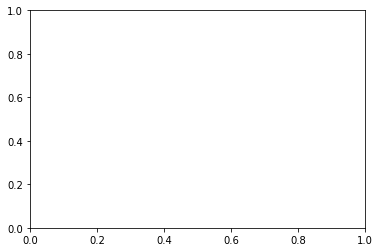

In [18]:
if __name__ == '__main__':
    main()

